![](https://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg)

# Project 1: [Titanic](https://www.kaggle.com/c/titanic/data)
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you will exercise your skills with loading data, python data structures, and Pandas to identify charactaristics of Titanic survivors!

---
#### Your goals should be to:
* Practice python programming including loops, conditionals, types, functions, and data structures
* Start thinking critically about manipulating, organizing, and interpreting data
* Troubleshoot errors

---
#### Getting Started:
* **fork** the repository on git.generalassemb.ly
* **clone** your forked repo

---
#### Submission:
* You should be working on a **fork** of the GA project one repository. 
* Use **git** to manage versions of your project. Make sure to `add`, `commit`, and `push` your changes to **your fork** of the github 
* Submit a link to your project repository in the submission form by **Friday, 9/29 11:59 PM**. You will then receive the solutions.
* Create a copy of your original notebook (file > make a copy in jupyter notebook)
* In the copy, use the solutions to correct your work. Make sure to take note of your successes and struggles. Did you learn anything new from correcting your work?
* Submit the corrected version by **Sunday, 10/1 11:59 PM** to receive instructor feedback on your work. ***Projects submitted after this deadline will not receive instructor feedback.***

### Considerations:

* You will be generating long data strutures- avoid displaying the whole thing. Display just the first or last few entries and look at the length or shape to check whether your code gives you back what you want and expect.
* Make functions whenever possiblle!
* Be explicit with your naming. You may forget what `this_list` is, but you will have an idea of what `passenger_fare_list` is. Variable naming will help you in the long run!
* Don't forget about tab autocomplete!
* Use markdown cells to document your planning, thoughts, and results. 
* Delete cells you will not include in your final submission
* Try to solve your own problems using this framework:
  1. Check your spelling
  2. Google your errors. Is it on stackoverflow?
  3. Ask your classmates
  4. Ask a TA or instructor
* Do not include errors or stack traces (fix them!)

# 1. Using the `with open()` method in the `csv` library, load the titanic dataset into a list of lists.

* The `type()` of your dataset should be `list`
* The `type()` of each element in your dataset should also be `list`
* The `len()` of your dataset should be 892 (892 rows, including the header)
* The `len()` of each row element in your dataset should be have a `len()` of 12
* Print out the first 3 rows including the header to check your data.

In [4]:
import csv
from IPython.display import display
import numpy as np
import pandas as pd

In [5]:
# Your code here
with open("titanic.csv", newline='') as csvfile:    
    reader = csv.reader(csvfile, delimiter=',')
    titanic_master = list(reader) #list of lists
print(titanic_master[:5])





[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], ['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C'], ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S'], ['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']]


In [6]:
len(titanic_master)

892

# 2. Separate the first header row from the rest of your dataset. 

* The header should be a list of the column names
* The data should be the rest of your data
* Display the header and the first row of the dataset zipped together using `zip`
* Your result should look like...


```
[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ...
 ('Embarked', 'S')]
 ```

In [7]:
# Your code here
header = titanic_master[0]
data = titanic_master[1:]



In [8]:
len(data)

891

In [9]:
print(header)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [10]:
pprint(data)

Pretty printing has been turned OFF


# 3. Using a `for` loop, load your data into a `dict` called `data_dict`.

* The keys of your `data_dict` should be `PassengerId`
* The values of your `data_dict` should be dictionaries...
  * Each of these dictionaries should reperesent a column value within a row
  * The keys should be the names of the columns
  * The values should be the values of that column
  
The beginning of your `data_dict` should look like: 

    {'1': {'Age': '22',
      'Cabin': '',
      'Embarked': 'S',
      'Fare': '7.25',
      'Name': 'Braund, Mr. Owen Harris',
      'Parch': '0',
      'Pclass': '3',
      'Sex': 'male',
      'SibSp': '1',
      'Survived': '0',
      'Ticket': 'A/5 21171'},
     '10': {'Age': '14',
      'Cabin': '',
      'Embarked': 'C',
      'Fare': '30.0708',
      'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
      'Parch': '0',
      'Pclass': '2',
      'Sex': 'female',
      'SibSp': '1',
      'Survived': '1',
      'Ticket': '237736'},
      ...
      }

In [11]:
data_dict = {}


for passenger in data:  #iterates through the data list we created
    zipped = dict(zip(header[1:], passenger[1:]))  #zips the header list(not with the passengerID) with the data list
    key = passenger[0]  #assigns the key of the dictionary to the PassengerID, or 0th index of each list
    data_dict[key] = zipped  


# 4. Repeat step 3 using a dictionary comprehension.

* Using `==`, check if your `data_dict` from your `for` loop is the same as the one from your dictionary comprehension.

In [13]:
for passenger in data:  #iterates through the data list we created
    zipped = dict(zip(header[1:], passenger[1:])) #zips the header list(not with the passengerID) with the data list
    #for all 891 rows
    key = passenger[0]  #assigns the key of the dictionary to the PassengerID, or 0th index of each list
    data_dict[key] = zipped

In [14]:
# Your code here
data_dict_comp = {passenger[0]:dict(zip(header[1:], passenger[1:])) for passenger in data}
#creates k:v pairs from the data[passenger] sub-list to a dictionary created
data_dict_comp == data_dict  #just comparing

True

# 5. Transform your `data_dict` to be oriented by column and call it `data_dict_columns`

* Currently, our `data_dict` is oriented by row, indexed by `"PassengerId"`. 
* Transform your data so that the title of each row is a key, the values are of type `list` and represent column vectors.

If you display `data_dict_columns`, the beginning should look like...

    {'Age': ['25',
      '36',
      '24',
      '40',
      '45',
      '2',
      '24',
      '28',
      '33',
      '26',
      '39',
      ...

In [16]:
header

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [17]:
 # Working with Sylvia
print(header)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [18]:
# w/ Sylvia - create empty dictionary, but this time put each of teh elements in header as the new keys

# kevins_test_dictionary = {}

# kevins_test_dictionary[header[0]]=[]
# kevins_test_dictionary[header[1]]=[]
# kevins_test_dictionary[header[2]]=[]
# kevins_test_dictionary[header[3]]=[]
# kevins_test_dictionary[header[4]]=[]
# kevins_test_dictionary[header[5]]=[]
# kevins_test_dictionary[header[6]]=[]
# kevins_test_dictionary[header[7]]=[]
# kevins_test_dictionary[header[8]]=[]
# kevins_test_dictionary[header[9]]=[]
# kevins_test_dictionary[header[10]]=[]
# kevins_test_dictionary[header[11]]=[]


# kevins_test_dictionary

In [19]:
###work with Sylvia

# for header_name in header:
#     kevins_test_dictionary[header_name] = []
    
# print(kevins_test_dictionary)

In [20]:
###work with Sylvia.  and alternate way to do what I already did below.
# for rows in data:
#     kevins_test_dictionary['PassengerId'].append(rows[0])
#     kevins_test_dictionary['Survived'].append(rows[1])
#     kevins_test_dictionary['Pclass'].append(rows[2])
#     kevins_test_dictionary['Name'].append(rows[3])
#     kevins_test_dictionary['Sex'].append(rows[4])
#     kevins_test_dictionary['Age'].append(rows[5])
#     kevins_test_dictionary['SibSp'].append(rows[6])
#     kevins_test_dictionary['Parch'].append(rows[7])
#     kevins_test_dictionary['Ticket'].append(rows[8])
#     kevins_test_dictionary['Fare'].append(rows[9])
#     kevins_test_dictionary['Cabin'].append(rows[10])
#     kevins_test_dictionary['Embarked'].append(rows[11])


In [21]:
data_dict_columns = {}


# Storing empty lists here
ages = []
Survived = []
Pclass = [] 
Name = []
Sex = []
SibSp = []
Parch = []
Ticket = []
Fare =[]
Cabin = []
Embarked = []
############there must be a better way than below############

for key in list(data_dict.keys()): #cant iterate through dict keys, must create a list to do so
    for item in header[:1]:  #iterating though the header list, leaving out PassengerID in order to assign column names
###appending the empty lists for the value for each specific attribute###
        ages.append(data_dict[key]["Age"])
        Survived.append(data_dict[key]['Survived'])
        Pclass.append(data_dict[key]['Pclass'])
        Name.append(data_dict[key]['Name'])
        Sex.append(data_dict[key]['Sex'])
        SibSp.append(data_dict[key]['SibSp'])        
        Parch.append(data_dict[key]['Parch'])
        Ticket.append(data_dict[key]['Ticket'])
        Fare.append(data_dict[key]['Fare'])         
        Cabin.append(data_dict[key]['Cabin'])
        Embarked.append(data_dict[key]['Embarked'])         
        
        
        ###assigning out key value pairs
        data_dict_columns['Age'] = ages
        data_dict_columns['Survived'] = Survived
        data_dict_columns['Pclass'] = Pclass
        data_dict_columns['Name'] = Name
        data_dict_columns['Sex'] = Sex
        data_dict_columns['SibSp'] = SibSp
        data_dict_columns['Parch'] = Parch
        data_dict_columns['Ticket'] = Ticket
        data_dict_columns['Fare'] = Fare
        data_dict_columns['Cabin'] = Cabin
        data_dict_columns['Embarked'] = Embarked
     
# for key in list(data_dict.keys()):
#     ages.append(data_dict[key]['Age'])
#     data_dict_columns['Age'] = ages        
    
    
#     data_dict_columns = dict(zip(data_dict[0]:data_dict[1]
print(data_dict_columns)
#     for keys in data_dict.values():
#         print(values)



{'Age': ['22', '38', '26', '35', '35', '', '54', '2', '27', '14', '4', '58', '20', '39', '14', '55', '2', '', '31', '', '35', '34', '15', '28', '8', '38', '', '19', '', '', '40', '', '', '66', '28', '42', '', '21', '18', '14', '40', '27', '', '3', '19', '', '', '', '', '18', '7', '21', '49', '29', '65', '', '21', '28.5', '5', '11', '22', '38', '45', '4', '', '', '29', '19', '17', '26', '32', '16', '21', '26', '32', '25', '', '', '0.83', '30', '22', '29', '', '28', '17', '33', '16', '', '23', '24', '29', '20', '46', '26', '59', '', '71', '23', '34', '34', '28', '', '21', '33', '37', '28', '21', '', '38', '', '47', '14.5', '22', '20', '17', '21', '70.5', '29', '24', '2', '21', '', '32.5', '32.5', '54', '12', '', '24', '', '45', '33', '20', '47', '29', '25', '23', '19', '37', '16', '24', '', '22', '24', '19', '18', '19', '27', '9', '36.5', '42', '51', '22', '55.5', '40.5', '', '51', '16', '30', '', '', '44', '40', '26', '17', '1', '9', '', '45', '', '28', '61', '4', '1', '21', '56', '18',

In [22]:
from pprint import pprint

In [23]:
pprint(data_dict_columns)

{'Age': ['22',
         '38',
         '26',
         '35',
         '35',
         '',
         '54',
         '2',
         '27',
         '14',
         '4',
         '58',
         '20',
         '39',
         '14',
         '55',
         '2',
         '',
         '31',
         '',
         '35',
         '34',
         '15',
         '28',
         '8',
         '38',
         '',
         '19',
         '',
         '',
         '40',
         '',
         '',
         '66',
         '28',
         '42',
         '',
         '21',
         '18',
         '14',
         '40',
         '27',
         '',
         '3',
         '19',
         '',
         '',
         '',
         '',
         '18',
         '7',
         '21',
         '49',
         '29',
         '65',
         '',
         '21',
         '28.5',
         '5',
         '11',
         '22',
         '38',
         '45',
         '4',
         '',
         '',
         '29',
         '19',
         '17',
     

           'D33',
           '',
           'A26',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           'D48',
           '',
           '',
           'E58',
           '',
           '',
           '',
           '',
           '',
           '',
           'C126',
           '',
           'B71',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           'B51 B53 B55',
           '',
           'D49',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           'B5',
           'B20',
           '',
           '',
           '',
           '',
           '',
           '',
           '',
           'C68',
           'F G63',
           'C62 C64',
           'E24',
           '',
           '',
           '',
           '',
           '',
           'E2

           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '2',
           '0',
           '0',
           '0',
           '2',
           '0',
           '0',
           '0',
           '0',
           '1',
           '0',
           '2',
           '2',
           '0',
           '0',
           '0',
           '0',
           '2',
           '0',
           '1',
           '0',
           '0',
           '0',
           '2',
           '1',
           '0',
           '0',
           '0',
           '1',
           '2',
           '1',
           '4',
           '0',
           '0',
           '0',
           '1',
           '1',
           '0',
           '0',
           '1',
           '1',
           '0',
           '0',
           '0',
           '2',
           '0',
           '2',
           '1',
           '2',
           '0',
           '0',
           '0',
           '1',
           '0',
           '0',
           '0',
        

           '0',
           '1',
           '0',
           '1',
           '0',
           '0',
           '0',
           '0',
           '0',
           '2',
           '0',
           '1',
           '1',
           '0',
           '1',
           '0',
           '0',
           '0',
           '1',
           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '0',
           '2',
           '0',
           '0',
           '1',
           '0',
           '0',
           '0',
           '1',
           '1',
           '0',
           '0',
           '5',
           '0',
           '0',
           '0',
           '1',
           '3',
           '1',
           '0',
           '0',
           '1',
           '1',
           '0',
           '0',
           '0',
           '0',
           '0',
           '1',
           '0',
           '1',
           '0',
           '0',
        

In [24]:
# type(data_dict_columns['Age'][100])

type(data_dict_columns['Age'][0])


<class 'str'>

# 6. Data Types

What is the current `type` of each column? What do you think the data type of each column *should* be? The data types in Python are...

* `int`
* `float`
* `str`
* `bool`
* `tuple`
* `list`
* `dict`
* `set`

In a markdown cell, describe what each column represents and what the `type` of each value should be. **Extra:** If you want to be fancy, use a [markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) to display your results.

#### Your answer here (double click here to edit this markdown cell, and press shift-enter exit edit mode!):

All values are strings, as they are all accompanied by the ' '.
To do a proper analysis the columns should be as follows:
['PassengerId'] = int;

['Survived'] = bool via the integer 0/1 which were provided;

['Pclass'] = int;

['Name'] = str;

['Sex'] = str;

['Age'] = int;

['SibSp'] - int;

['Parch'] - int;

['Ticket'] - str;

['Fare'] - float;

['Cabin'] - str;

['Embarked'] - str


# 7. Transform each column to the appropriate type if needed.

Build a function called `transform_column` that takes arguments for a `data_dict`, `column_name`, and `datatype`, and use it to transofm the columns that need transformation.

**NOTE:** There are values in this dataset that cannot be directly cast to a numerical value. Use `if/then` or `try/except` statements to handle errors. 

**To help identify potential sources of errors, explore the `set` of values in each column.**

In [25]:
# Your code here


def transform_column(col, dtype, data_dict = data_dict_columns):
    
    newList = []  #creating a newList to populate with columns created with the newly desired datatypes
#     empty_count = 0
#     fail_count = 0
    
    
    for i in range(len(data_dict_columns[col])):
        
        
        
        try:
            newList.append(dtype(data_dict_columns[col][i]))

            
        except:


            newList.append(np.nan)

    return newList


        
transform_Age = transform_column('Age', int, data_dict = data_dict_columns)
transform_Survived = transform_column('Survived', int, data_dict = data_dict_columns)
transform_Pclass = transform_column('Pclass', int, data_dict = data_dict_columns)
# transform_Name = transform_column('Name', str, data_dict = data_dict_columns)
# transform_Sex = transform_column('Sex', str, data_dict = data_dict_columns)
transform_SibSp = transform_column('SibSp', int, data_dict = data_dict_columns)
transform_Parch = transform_column('Parch', int, data_dict = data_dict_columns)
# transform_Ticket = transform_column('Ticket', str, data_dict = data_dict_columns)
transform_Fare = transform_column('Fare', float, data_dict = data_dict_columns)
# transform_Cabin = transform_column('Cabin', str, data_dict = data_dict_columns)
# transform_Embarked = transform_column('Embarked', str, data_dict = data_dict_columns)

print(newList)

NameError: name 'newList' is not defined

In [ ]:
transform_Age


# 8. Build functions to calculate the mean, sample standard deviation, and median of a list of ints or floats. Use `scipy.stats.mode` or build your own mode function!


If you filled any missing values with `np.NaN`, you may need to handle that in your functions (look up `np.isnan()`).

If building a `mode` function is too difficult, you import mode from `scipy.stats` using `from scipy.stats import mode`.

**Optional:**  Build a function for calculating the Mode that returns the mode value *and* the count of that value. Mode is tricky, so start by building a function that counts the occurances of each value. You may also need to sort using a `key` with a `lambda function` inside. You may also find a `defaultdict` useful.

Mean

In [ ]:
from scipy.stats import mode

In [ ]:
def this_mean(data_list):  
    return np.nanmean(data_list)
    
    
# this_mean(transform_Age)

In [ ]:
this_mean(transform_SibSp)

In [ ]:
def this_std(data_list):
    return np.nanstd(data_list)
    

In [ ]:
this_std(transform_Age)

Median

In [ ]:
def this_median(data_list):
    return np.nanmedian(data_list)
    

In [ ]:
this_median(transform_Age)

Mode

In [ ]:
def this_mode(data_list):
    return mode(data_list)


In [ ]:
this_mode(transform_Age)

# 9. Summary Statistics of Numerical Columns

For numerical columns, what is the mean, standard deviation, mean, and mode for that data? Which measure of central tendency is the most descriptive of each column? Why? Explain your answer in a markdown cell.

In [ ]:
###attempting to create a function for each transformed column I want to call
def print_summary_stats(data_list):   ###Could not figure how to print out the string with each variable
    print("mean: ", this_mean(data_list))
    print("std dev: ", this_std(data_list))
    print("median: ", this_median(data_list))
    print("mode: ", this_mode(data_list))
    return


In [ ]:
print_summary_stats(transform_Survived)  
print_summary_stats(transform_Age)
print_summary_stats(transform_Pclass)
print_summary_stats(transform_Parch)
print_summary_stats(transform_SibSp)
print_summary_stats(transform_Fare)



'str(transform_Survived)'

In [ ]:
transform_Survived Summary Stats
mean:  0.383838383838
std dev:  0.486319317867
median:  0.0
mode:  ModeResult(mode=array([0]), count=array([549]))
    
transform_Age summary stats
mean:  29.847605225
std dev:  14.3072747615
median:  28.0
mode:  ModeResult(mode=array([ 24.]), count=array([30]))
    
transform_Pclass summary stats    
mean:  2.30864197531
std dev:  0.83560193348
median:  3.0
mode:  ModeResult(mode=array([3]), count=array([491]))   
    
transform_Parch summary stats    
mean:  0.381593714927
std dev:  0.805604761245
median:  0.0
mode:  ModeResult(mode=array([0]), count=array([678]))

transform_SibSp summary stats    
mean:  0.523007856341
std dev:  1.10212443509
median:  0.0
mode:  ModeResult(mode=array([0]), count=array([608]))    
    
transform_Fare summary stats    
mean:  32.2042079686
std dev:  49.6655344448
median:  14.4542
mode:  ModeResult(mode=array([ 8.05]), count=array([43]))
    

Your markdown response here

transform_Survived Summary Stats
mean:  0.383838383838
std dev:  0.486319317867
median:  0.0
mode:  ModeResult(mode=array([0]), count=array([549]))
    
transform_Age summary stats
mean:  29.847605225
std dev:  14.3072747615
median:  28.0
mode:  ModeResult(mode=array([ 24.]), count=array([30]))
    
transform_Pclass summary stats    
mean:  2.30864197531
std dev:  0.83560193348
median:  3.0
mode:  ModeResult(mode=array([3]), count=array([491]))   
    
transform_Parch summary stats    
mean:  0.381593714927
std dev:  0.805604761245
median:  0.0
mode:  ModeResult(mode=array([0]), count=array([678]))

transform_SibSp summary stats    
mean:  0.523007856341
std dev:  1.10212443509
median:  0.0
mode:  ModeResult(mode=array([0]), count=array([608]))    
    
transform_Fare summary stats    
mean:  32.2042079686
std dev:  49.6655344448
median:  14.4542
mode:  ModeResult(mode=array([ 8.05]), count=array([43]))

# 10. Splitting the Data to Predicting Survival

For all the passengers in the dataset, the mean survival rate is around .38 (38% of the passengers survived). From our data, we may be able to profile who survived and who didn't!

Split the data by pclass. Does the class a passenger was in affect survivability? You can do this by:
* Creating a list of `True` and `False` values conditional on a column's value
* Taking the mean of the `Survived` column where those values are `True`

In [377]:
###zip the data, by class and Survival.  Change Survival to TRUE / FALSE.

###iterate through each Pclass, return the mean for the Survival rate of all 3 Pclasses

In [27]:
print(transform_Pclass)

[3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1, 

In [193]:
# unique_Pclass = [(i,j) for i in transform_Pclass for j in transform_Survived]
unique_Pclass = list(zip([transform_Pclass, transform_Survived]))

# Pclass1 = []
# Pclass2 = []
# Pclass3 = []
# Your code here
# unique_Pclass = zip(transform_Pclass, transform_Survived)

# for i in unique_Pclass[0]:
#     print(i)
#     if i == 1:
#         Pclass1.append(i)
#     elif i == 2:
#         Pclass2.append(i)
#     else:
#         Pclass3.append(i)


unique_Pclass        ### I suck, ran out of time, and couldnt get it to work###

[([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1

# 11. Independent Work

Use the techniques from step 10 to make different conditional splits in the `Survived` column. Can you find a combination of splits that maximizes the survival rate?

In [8]:
# Your code here

# 12. Distributions

### A) For each of your numeric features, use `pyplot` subplots to plot a hisogram for each feature.

* Make sure to title each subplot.
* If you get an error, it may be caused by `np.NaN`

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  ###I couldnt get my subplots to work becuase I never put all my transformed lists
                    ###back into any combined dictionary

(array([ 549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  342.]), array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), <a list of 10 Patch objects>)

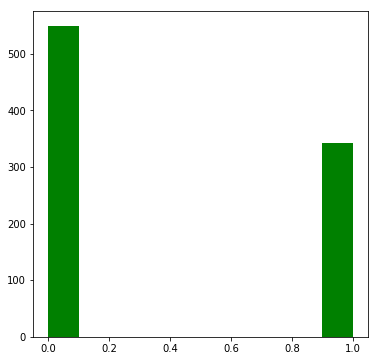

In [114]:
fig = plt.figure(figsize=(6,6))
# for col in enumerate(transform_Survived): #iterating with the index and the columns 0 through 2
# fig.add_subplot(3,2,i+1)   ###Couldnt get these subplots to work
#     Add a histogram for the column in the loop from the purchase dataframe.
plt.hist(transform_Survived, label = 'Survived', color='green') #plots results from each column we iterated through
# plt.hist(transform_Age, label = 'Age', color='green')
# plt.hist(transform_Pclass, label = 'Pclass', color='green')
# plt.hist(transform_Parch, label = 'Parch', color='green')
# plt.hist(transform_SibSp, label = 'SibSp', color='green')
# plt.hist(transform_Fare, label = 'Fare', color='green')

    

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  43.,   32.,  162.,  176.,  119.,   70.,   49.,   26.,   10.,    2.]), array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.]), <a list of 10 Patch objects>)

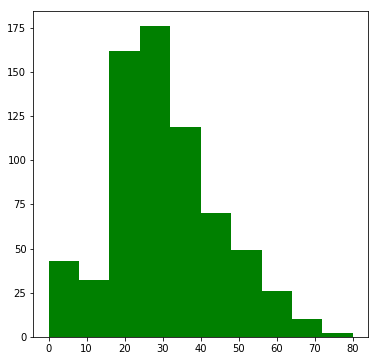

In [112]:
fig2 = plt.figure(figsize=(6,6))
plt.hist(transform_Age, range=(0,80), label = 'Age', color='green')

(array([ 216.,    0.,    0.,    0.,    0.,  184.,    0.,    0.,    0.,  491.]), array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]), <a list of 10 Patch objects>)

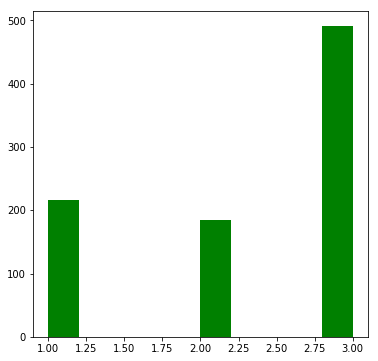

In [107]:
fig3 = plt.figure(figsize=(6,6))
plt.hist(transform_Pclass, label = 'Pclass', color='green')

(array([ 678.,  118.,    0.,   80.,    0.,    5.,    4.,    0.,    5.,    1.]), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]), <a list of 10 Patch objects>)

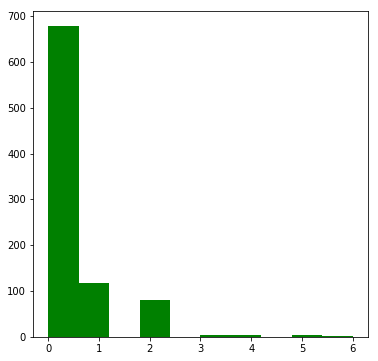

In [106]:
fig4 = plt.figure(figsize=(6,6))
plt.hist(transform_Parch, label = 'Parch', color='green')

(array([ 608.,  209.,   28.,   16.,    0.,   18.,    5.,    0.,    0.,    7.]), array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]), <a list of 10 Patch objects>)

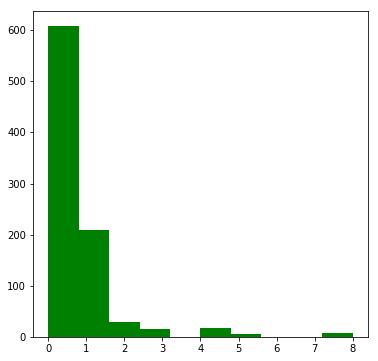

In [105]:
fig5 = plt.figure(figsize=(6,6))
plt.hist(transform_SibSp, label = 'SibSp', color='green')

(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]), array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
        256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
        512.3292 ]), <a list of 10 Patch objects>)

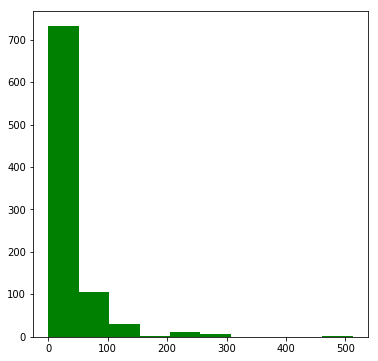

In [116]:
fig6 = plt.figure(figsize=(6,6))
plt.hist(transform_Fare, label = 'Fare', color='green')

### B) for each of these values, what's the 90% confidence interval of the population mean?

* Create a function to find the confidence interval, and use it on each of the numeric columns.
* What's your interpretation of the interval?

In [120]:
from scipy import stats
# Your code here

# 13. Pandas

### A: Load the titanic csv into a `DataFrame` using `pd.read_csv()`

In [124]:
import pandas as pd

In [125]:
titanic_df = pd.read_csv('./titanic.csv')

### B: Display the first 5 rows, the last 4 rows, and a sample of 3 rows.

In [126]:
# Your code here
display(titanic_df.head())
display(titanic_df.tail(4))
display(titanic_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S


### C: Create a row mask that is `True` when `Pclass == 3`. Use this to mask your `DataFrame`. Find the mean of the `Survived` column. Is it the same as what we calculated in part 10?

In [127]:
pclass3_mask = titanic_df['Pclass'] == 3  ###creates a new mask variable for 'Pclass'==3
titanic_df[pclass3_mask]['Survived'].mean() ###applied the mask, called for mean() of Survived column
### 1=survived, this number is closer to 0, or mostly dead###

0.24236252545824846

### D: Using a `.groupby()`, what is the mean of the survival column grouped by `Pclass` and `Sex`. What are your observations?

In [128]:
category = titanic_df.groupby(['Pclass', 'Sex']) ###create a new variable, groupedby Pclas & sex

category.Survived.mean()   ### called the variable, 'Survived.mean() is a method applied to this variable

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [129]:
titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, dtype: int64

### E: Survival Rate by Age Range:  `pd.cut()` takes two arguments: A `list`, `Series`, or `array`, and a list of bins. Create a new column in your `DataFrame` using `pd.cut()` that groups your ages into bins of 5 years. Then, use `.groupby()` to display the survival rate and count for each age group

In [130]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]  #creating 15 bins
titanic_df['age_range'] = pd.cut(titanic_df['Age'], bins = bins)  #appends a new column at the end of the DF
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 35]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 55]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 5]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(25, 30]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(10, 15]"


In [147]:
titanic_df.groupby(['age_range'])['Survived'].mean()   ###curious about the means among the age range groups
# titanic_df.groupby(['age_range'])['Survived'].count()


age_range
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
Name: Survived, dtype: float64

# 14. Hypothesis Testing

### A) Hypothesis:

Create a null and alternate hypothesis to ask the following quesiton: Was the `Age` of survivors different from that of people who didn't survive?

**Hypotheses:**

$H_0$: The null hypothesis here should state that there is no correlation between Age and the rate of Survival.

$H_1$: The alternate hypothesis states that Age has a correlation to the likelihood of Survival.

In [192]:
survivors = titanic_df.Survived==1  ###masks created for  Survival, to be put back into our dataframe
non_survivors = titanic_df.Survived==0  ###mask created for non_Survival, to be put back into our dataframe

In [191]:
titanic_df1 = titanic_df.dropna(subset=['Age'])  #had to remove the np.nan values!!!!!!
titanic_age = titanic_df1['Age']  ###isolate the age column with np.nan removed


### B) T-Testing

Use a t-test to test your null hypothesis. What's the p-value? What's your interpretation? Do you accept or reject your null hypothesis? What does this mean in terms of `Age`?

In [166]:
ttest = stats.ttest_ind

In [189]:
pvalue = stats.ttest_ind(titanic_df1['Age'][survivors], titanic_age[non_survivors]).pvalue
pvalue

0.039124654013482488

In [ ]:
# Given that the p-value is low (p < 0.05), we can REJECT our null hypothesis.  This comfirms that age has a
# correlation to the likelihood of survival.

# 13. Write-up

Use markdown cells to answer the following questions:

1. What is the main difference between a list and a tuple? 
2. Can you iterate over a dictionary? If so, how?  
3. What is the term for a list or array of `True` and `False` values used to select certain rows or columns in a `DataFrame`? 
4. If you have a continuous variable, when would the median be a better descriptor than the mean? Why?  
5. Give a qualitative description of the survivors of the titanic based on the effects of your splits in the data on survival rate. Or, given a row, what columns would you look at to guess if they survived? 


1. Lists are mutable, tuples cannot be modified.
2. Yes, but as I understand it, you must break the dictionary down with a method, like .keys(), .items() and use a list function to properly iterate a dictionary.
3. "MASK"
4. Median would be a better descriptor when there are outliers which skew the mean (and std. dev), either in the high or low direction.
5. Sex and Pclass (or Passenger Class) seemed to correlate the most with survival rate. Given any specific row, I would first look at Sex and Pclass, followed by age, which appeared to correlate give the p-values which were obtained.

# 14. Evaluation

Please use markdown cells to submit your responses. 

1. What was easy for you in this project?  NO, it was a big challenge.
2. What was difficult?  Yes, it stretched my knowledge of Python to the MAX.
3. Where did you make the most improvement?  Pandas.  It is just much easier to grasp.
4. Where would you like to improve?  Function writing, dictionary iteration / manipulations, FOR loops, sub-plotting!!!